# Self-Driving Car Engineer Nanodegree

## Deep Learning

## Project: Build a Traffic Sign Recognition Classifier

In this notebook, traffic signs are  being classified using convoluted neural network


---
## Step 0: Load The Data

In [1]:
# Load pickled data
import pickle

training_file = './train.p'
validation_file='./valid.p'
testing_file = './test.p'

with open(training_file, mode='rb') as f:
    train = pickle.load(f)
with open(validation_file, mode='rb') as f:
    valid = pickle.load(f)
with open(testing_file, mode='rb') as f:
    test = pickle.load(f)
    
X_train, y_train = train['features'], train['labels']
X_valid, y_valid = valid['features'], valid['labels']
print(len(X_valid))
print(len(y_valid))
print(y_train.shape)
X_test, y_test = test['features'], test['labels']

4410
4410
(34799,)


---

## Step 1: Dataset Summary & Exploration

The pickled data is a dictionary with 4 key/value pairs:

- `'features'` is a 4D array containing raw pixel data of the traffic sign images, (num examples, width, height, channels).
- `'labels'` is a 1D array containing the label/class id of the traffic sign. The file `signnames.csv` contains id -> name mappings for each id.
- `'sizes'` is a list containing tuples, (width, height) representing the original width and height the image.
- `'coords'` is a list containing tuples, (x1, y1, x2, y2) representing coordinates of a bounding box around the sign in the image. **THESE COORDINATES ASSUME THE ORIGINAL IMAGE. THE PICKLED DATA CONTAINS RESIZED VERSIONS (32 by 32) OF THESE IMAGES**


###  Basic Summary of the Data Set Using Python, Numpy and/or Pandas

In [2]:
### Replace each question mark with the appropriate value. 
### Use python, pandas or numpy methods rather than hard coding the results
import numpy as np 
# TODO: Number of training examples
n_train = len(X_train)

# TODO: Number of validation examples
n_validation = len(X_valid)

# TODO: Number of testing examples.
n_test = len(X_test)

# TODO: What's the shape of an traffic sign image?
image_shape = X_train[0].shape

# TODO: How many unique classes/labels there are in the dataset.
n_classes = len(np.unique(y_train))

print("Number of training examples =", n_train)
print("Number of testing examples =", n_test)
print("Number of validation examples =", n_validation)
print("Image data shape =", image_shape)
print("Number of classes =", n_classes)


Number of training examples = 34799
Number of testing examples = 12630
Number of validation examples = 4410
Image data shape = (32, 32, 3)
Number of classes = 43


### DataSet Exploration

The German Traffic Signs Dataset was visualized using the pickled file(s).

The [Matplotlib](http://matplotlib.org/) [examples](http://matplotlib.org/examples/index.html) and [gallery](http://matplotlib.org/gallery.html) pages were used for doing visualizations in Python.

39


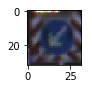

In [3]:
import random
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

index = random.randint(0, len(X_train))
image = X_train[index].squeeze()
plt.figure(figsize=(1,1))
plt.imshow(image, cmap="gray")
print(y_train[index])

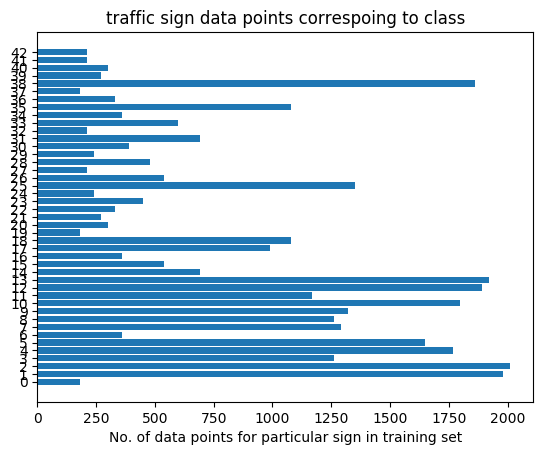

In [4]:
# Calculating data points corresponding to each traffic sign
classes = np.unique(y_train,return_counts=True)
class_index=classes[0]
Data_points = classes[1]
plt.rcdefaults()
fig, ax = plt.subplots()
y_pos = np.arange(len(class_index))
ax.barh(y_pos,Data_points)
ax.set_yticks(y_pos)
ax.set_yticklabels(class_index)
ax.set_xlabel('No. of data points for particular sign in training set')
ax.set_title('traffic sign data points correspoing to class')
 

----

## Step 2: Design and Test a Model Architecture

A deep learning network was designed and implemented that learns to recognize traffic signs. THis model was trained and tested on the [German Traffic Sign Dataset](http://benchmark.ini.rub.de/?section=gtsrb&subsection=dataset).

The LeNet-5 nework was used in the model. 

All these aspects were considered while developing the model

- Neural network architecture (is the network over or underfitting?)
- Preprocessing techniques (normalization, rgb to grayscale, etc)
- Number of examples per label (some have more than others).
- Generate fake data.

Here is an example of a [published baseline model on this problem](http://yann.lecun.com/exdb/publis/pdf/sermanet-ijcnn-11.pdf).

### Data Set Preprocessing  (normalization, grayscale, etc.)

Image data was normalized so that the data has zero mean and equal variance. For image data, `(pixel - 128)/ 128` is a quick way to approximately normalize the data and was used in this project. Grayscale preprocessing method was also tried on the model but it did not increase the valid_accuracy. Fake data was also tried  using image rotation but it did not yield better validation_acuration


In [5]:
### Code to convert image into grayscale

#X_train = np.sum(X_train/3, axis=3,keepdims=True)
# X_valid = np.sum(X_valid/3, axis=3,keepdims=True)
# X_test  = np.sum(X_test/3, axis=3,keepdims=True)

In [6]:
#Code to generate fake data by image _rotation and appending it to original data
#X_train=np.append(X_train,np.rot90(X_train,k=2,axes=(1,2)),axis=0)
#y_train =np.append(y_train,y_train,axis=0)


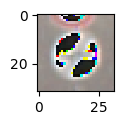

In [7]:
# Normalizing the data
# original X_data is uint8. it was converted to float32  before normalizing

X_train = (np.float32(X_train) - 128.0)/128
X_train = X_train-np.mean(X_train)
X_valid = (np.float32(X_valid) - 128.0)/128
X_valid = X_valid-np.mean(X_valid)
X_test = (np.float32(X_test) - 128.0)/128
X_test = X_test-np.mean(X_test)
plt.figure(figsize=(1,1))
plt.imshow(X_train[7])

### Model Architecture

In [8]:
# data is being shuffled
from sklearn.utils import shuffle
X_train, y_train = shuffle(X_train, y_train)

In [9]:
import tensorflow as tf
EPOCHS = 15
BATCH_SIZE = 16 

In [10]:
from tensorflow.contrib.layers import flatten
mu = 0
sigma = 0.1
keep_prob = tf.placeholder(tf.float32)   # keep_prob defines dropout 
def LeNet(x):
    
    # first convultation layer converted from 32x32x3 to 28x28x6
    conv1_w = tf.Variable(tf.truncated_normal(shape=(5,5,3,6),mean=mu,stddev =sigma))
    conv1_b = tf.Variable(tf.zeros(6))
    conv1 = tf.nn.conv2d(x, conv1_w, strides =[1,1,1,1], padding='VALID') + conv1_b
    
    #Activation
    conv1 = tf.nn.relu(conv1)
    
    # took max pool for the convolution layer converted from 28x28x6 to 14x14x6
    conv1 = tf.nn.max_pool(conv1,ksize=[1,2,2,1],strides=[1,2,2,1],padding='VALID')
    #dropout
    conv1= tf.nn.dropout(conv1,keep_prob)
    
    #2nd convulation layer converted from 14x14x6 to 10x10x16
    
    conv2_w = tf.Variable(tf.truncated_normal(shape=(5,5,6,16),mean = mu, stddev =sigma))
    conv2_b = tf.Variable(tf.zeros(16))
    conv2 = tf.nn.conv2d(conv1,conv2_w, strides = [1,1,1,1], padding = 'VALID') +  conv2_b
    
    #Acitvation
    conv2 = tf.nn.relu (conv2)
    
    # Pooling ,converted to 5x5x16
    conv2 = tf.nn.max_pool(conv2, ksize = [1,2,2,1], strides = [1,2,2,1], padding ='VALID')
    
    #dropout
    conv2= tf.nn.dropout(conv2,keep_prob)
    # flatten input 5x5x16, output = 400
    fc0 = flatten(conv2)
    
    # Fully Connected Layer3 : Input =400, Output =120 
    fc1_w = tf.Variable(tf.truncated_normal(shape=(400,120), mean = mu, stddev = sigma))
    fc1_b = tf.Variable(tf.zeros(120))
    fc1 = tf.matmul(fc0,fc1_w) + fc1_b
    
    #Activation
    fc1= tf.nn.relu(fc1)
    
    # Fully Connected Layer4 : Input =120, Output =84
    fc2_w = tf.Variable(tf.truncated_normal(shape=(120,84), mean = mu, stddev = sigma))
    fc2_b = tf.Variable(tf.zeros(84))
    fc2 = tf.matmul(fc1,fc2_w) + fc2_b
    
    #Activation
    fc2= tf.nn.relu(fc2)    
    
    # Fully Connected Layer5 : Input =84, Output =43
    fc3_w = tf.Variable(tf.truncated_normal(shape=(84,43), mean = mu, stddev = sigma))
    fc3_b = tf.Variable(tf.zeros(43))
    fc3 = tf.matmul(fc2,fc3_w) + fc3_b
    logits = fc3
    
    return logits


In [11]:
### Features and  Labels

x = tf.placeholder(tf.float32,[None,32,32,3])
y = tf.placeholder(tf.int32, [None])
# one-hot encoding
one_hot_y = tf.one_hot(y,43)
rate = tf.placeholder(tf.float32)   # rate will be decayed with epochs

In [12]:
logits = LeNet(x)
cross_entropy = tf.nn.softmax_cross_entropy_with_logits(labels=one_hot_y, logits=logits)
loss_operation = tf.reduce_mean(cross_entropy)
optimizer = tf.train.AdamOptimizer(learning_rate=rate)
training_operation = optimizer.minimize(loss_operation)

In [13]:
### Model Evaluation
correct_prediciton = tf.equal(tf.argmax(one_hot_y,1),tf.argmax(logits,1))
accuracy_operation = tf.reduce_mean(tf.cast(correct_prediciton, tf.float32))
saver = tf.train.Saver()

def evaluate(X_data, y_data):
    num_examples = len(X_data)
    total_accuracy = 0
    sess = tf.get_default_session()
    for offset in range(0, num_examples, BATCH_SIZE):
        batch_x, batch_y = X_data[offset:offset+BATCH_SIZE], y_data[offset:offset+BATCH_SIZE]
        accuracy = sess.run(accuracy_operation, feed_dict={x: batch_x, y: batch_y,keep_prob:1})
        total_accuracy += (accuracy * len(batch_x))
    return total_accuracy / num_examples
print(len(X_valid),len(y_valid))

4410 4410


### Train, Validate and Test the Model

A validation set was used to assess how well the model is performing. A low accuracy on the training and validation
sets imply underfitting. A high accuracy on the training set but low accuracy on the validation set implies overfitting.

In [14]:
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    num_examples = len(X_train)
    
    print("Training...")
    print()
    for i in range(EPOCHS):
        global epoch
        epoch=i
        X_train, y_train = shuffle(X_train, y_train)
        for offset in range(0, num_examples, BATCH_SIZE):
            end = offset + BATCH_SIZE
            batch_x, batch_y = X_train[offset:end], y_train[offset:end]
            sess.run(training_operation, feed_dict={x: batch_x, y: batch_y,keep_prob:0.75,rate:0.001*np.exp(-0.12*i)})
            
        validation_accuracy = evaluate(X_valid,y_valid)
        rate_print= rate.eval(feed_dict={rate:0.001*np.exp(-0.12*i)})
        print("EPOCH {} ...".format(i+1))
        print("Rate = {}".format(rate_print))
        print("Validation Accuracy = {:.3f}".format(validation_accuracy))
    saver.save(sess, './Traffic_Classifier')
    print("Model saved")

Training...

EPOCH 1 ...
Rate = 0.0010000000474974513
Validation Accuracy = 0.804
EPOCH 2 ...
Rate = 0.0008869204320944846
Validation Accuracy = 0.877
EPOCH 3 ...
Rate = 0.0007866278756409883
Validation Accuracy = 0.913
EPOCH 4 ...
Rate = 0.0006976763252168894
Validation Accuracy = 0.916
EPOCH 5 ...
Rate = 0.0006187834078446031
Validation Accuracy = 0.913
EPOCH 6 ...
Rate = 0.0005488116294145584
Validation Accuracy = 0.924
EPOCH 7 ...
Rate = 0.00048675225116312504
Validation Accuracy = 0.924
EPOCH 8 ...
Rate = 0.0004317105340305716
Validation Accuracy = 0.927
EPOCH 9 ...
Rate = 0.0003828928747680038
Validation Accuracy = 0.931
EPOCH 10 ...
Rate = 0.0003395955136511475
Validation Accuracy = 0.927
EPOCH 11 ...
Rate = 0.0003011942026205361
Validation Accuracy = 0.927
EPOCH 12 ...
Rate = 0.0002671352995093912
Validation Accuracy = 0.931
EPOCH 13 ...
Rate = 0.00023692776449024677
Validation Accuracy = 0.937
EPOCH 14 ...
Rate = 0.00021013607329223305
Validation Accuracy = 0.933
EPOCH 15 ...


In [15]:
# Evaluating the accuracy on test data 
with tf.Session() as sess:
    saver.restore(sess, tf.train.latest_checkpoint('.'))

    test_accuracy = evaluate(X_test, y_test)
    print("Test Accuracy = {:.3f}".format(test_accuracy))

Test Accuracy = 0.937


---

## Step 3: Test a Model on New Images

5 images was downloaded from internet and model was tested on web images
 `signnames.csv` was used to map the class id(integer) corresponding to the actual sign name.

### Load and Output the Images

In [16]:
import cv2
from scipy import misc

['road_work.jpg', 'slippery_road.jpg', 'stop.png', 'speed_limit_120.jpg', 'speed_limit60.jpg']


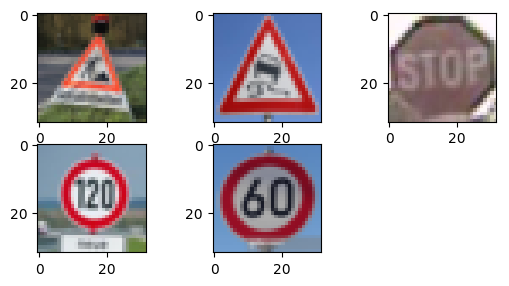

In [17]:
### Load the images and plot them here.

import matplotlib.image as mpimg
import os
import numpy as np
image=np.zeros([5,32,32,3])
image=np.uint8(image)
list_images=os.listdir('./test_images')
print(list_images)
for n in range(0,5):
    image[n]= misc.imresize(mpimg.imread('test_images/{}'.format(list_images[n])),(32,32,3))
    plt.subplot(3,3,(n+1))
    plt.imshow(image[n])

X_test_new = image
y_test_new = np.array([25,23,14,8,3])
y_test_new = np.int32(y_test_new)


### Predict the Sign Type for Each Image

In [18]:
#Preprocessing web image
X_test_new = (np.float32(X_test_new)-128.0)/128.0
X_test_new = X_test_new-np.mean(X_test_new)


In [19]:
# predicting image sign type

with tf.Session() as sess:
    saver.restore(sess, tf.train.latest_checkpoint('.'))
    web_image_prediction = sess.run(logits, feed_dict={x:X_test_new,keep_prob:1})
    print("web_image_prediction: {}".format(web_image_prediction))

web_image_prediction: [[ -5.92906475  -5.36328697  -6.26254416  -8.06308556  -8.2445097
   -6.3188839  -12.18930149 -10.68730164  -8.82438469 -10.34485245
   -8.59554005  -0.73608911 -12.2279911  -13.3404808   -9.88924789
   -8.9878397  -14.54755211  -5.28233433  -3.74042773  -4.92051506
   -0.78777564  -0.17050402  -5.93679094  -0.55724394  -3.13372231
   -2.5423522   -5.64779758  -1.27913117  -0.96367091  -3.63172412
   -3.73701382   2.04908013 -13.08231735 -15.19911766 -11.96197319
  -14.29626751 -12.27515316 -15.63266373 -12.01462173 -15.86412144
  -13.12009525 -17.41009712 -16.66850281]
 [-61.93756866 -37.44505692 -35.17294693 -27.22271919 -47.58026886
  -32.9184494  -50.68767548 -32.34501266 -48.22183228 -24.2684803
  -17.67178535  -5.17468596 -39.74062729 -57.22198486 -73.36088562
  -43.06839752 -28.08408546 -45.87690735 -15.42438316  -5.46776438
    3.08600593 -10.58147717 -54.94812393  10.42505169  -3.81137443
  -13.48149204 -19.18378258  -1.94581258   0.23152037 -20.02315521


### Analyze Performance

In [20]:
### Calculating the accuracy for  5 new images. 


with tf.Session() as sess:
    saver.restore(sess, tf.train.latest_checkpoint('.'))
    #soft = sess.run(softmax,feed_dict={x:X_test_new,keep_prob:1})
    webimage_accuracy = accuracy_operation.eval(feed_dict={x:X_test_new, y:y_test_new,keep_prob:1})
    #soft_prob= sess.run(tf.nn.top_k(soft, k=5))
    print("web image accuracy = {:.3f}".format(webimage_accuracy))
    #print(soft_prob)

web image accuracy = 0.800


### Output Top 5 Softmax Probabilities For Each Image Found on the Web

In [21]:
### Print out the top five softmax probabilities for the predictions on the German traffic sign images found on the web. 
softmax=tf.nn.softmax(logits)
with tf.Session() as sess:
    saver.restore(sess, tf.train.latest_checkpoint('.'))
    soft = sess.run(softmax,feed_dict={x:X_test_new,keep_prob:1})
    soft_prob= sess.run(tf.nn.top_k(soft, k=5))
    print(soft_prob)

TopKV2(values=array([[  7.05687821e-01,   7.66759962e-02,   5.20835258e-02,
          4.35541011e-02,   4.13601175e-02],
       [  9.99308228e-01,   6.49220834e-04,   3.73856710e-05,
          4.23741994e-06,   6.55991244e-07],
       [  5.72326541e-01,   3.48622829e-01,   6.24461174e-02,
          4.98974510e-03,   4.60447790e-03],
       [  9.97400403e-01,   2.44013080e-03,   8.78095670e-05,
          5.95626007e-05,   1.17681893e-05],
       [  9.99981046e-01,   1.88311697e-05,   8.58284039e-08,
          2.84007158e-11,   3.32959089e-17]], dtype=float32), indices=array([[31, 21, 23, 11, 20],
       [23, 20, 28, 27, 24],
       [14, 25,  1,  3, 12],
       [ 8,  7,  5,  2,  3],
       [ 3,  2,  5,  1,  0]], dtype=int32))


---

## Step 4 (Optional): Visualize the Neural Network's State with Test Images

 This Section is not required to complete but acts as an additional excersise for understaning the output of a neural network's weights. While neural networks can be a great learning device they are often referred to as a black box. We can understand what the weights of a neural network look like better by plotting their feature maps. After successfully training your neural network you can see what it's feature maps look like by plotting the output of the network's weight layers in response to a test stimuli image. From these plotted feature maps, it's possible to see what characteristics of an image the network finds interesting. For a sign, maybe the inner network feature maps react with high activation to the sign's boundary outline or to the contrast in the sign's painted symbol.

 Provided for you below is the function code that allows you to get the visualization output of any tensorflow weight layer you want. The inputs to the function should be a stimuli image, one used during training or a new one you provided, and then the tensorflow variable name that represents the layer's state during the training process, for instance if you wanted to see what the [LeNet lab's](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/601ae704-1035-4287-8b11-e2c2716217ad/concepts/d4aca031-508f-4e0b-b493-e7b706120f81) feature maps looked like for it's second convolutional layer you could enter conv2 as the tf_activation variable.

For an example of what feature map outputs look like, check out NVIDIA's results in their paper [End-to-End Deep Learning for Self-Driving Cars](https://devblogs.nvidia.com/parallelforall/deep-learning-self-driving-cars/) in the section Visualization of internal CNN State. NVIDIA was able to show that their network's inner weights had high activations to road boundary lines by comparing feature maps from an image with a clear path to one without. Try experimenting with a similar test to show that your trained network's weights are looking for interesting features, whether it's looking at differences in feature maps from images with or without a sign, or even what feature maps look like in a trained network vs a completely untrained one on the same sign image.

<figure>
 <img src="visualize_cnn.png" width="380" alt="Combined Image" />
 <figcaption>
 <p></p> 
 <p style="text-align: center;"> Your output should look something like this (above)</p> 
 </figcaption>
</figure>
 <p></p> 


In [22]:
### Visualize your network's feature maps here.
### Feel free to use as many code cells as needed.

# image_input: the test image being fed into the network to produce the feature maps
# tf_activation: should be a tf variable name used during your training procedure that represents the calculated state of a specific weight layer
# activation_min/max: can be used to view the activation contrast in more detail, by default matplot sets min and max to the actual min and max values of the output
# plt_num: used to plot out multiple different weight feature map sets on the same block, just extend the plt number for each new feature map entry

def outputFeatureMap(image_input, tf_activation, activation_min=-1, activation_max=-1 ,plt_num=1):
    # Here make sure to preprocess your image_input in a way your network expects
    # with size, normalization, ect if needed
    # image_input =
    # Note: x should be the same name as your network's tensorflow data placeholder variable
    # If you get an error tf_activation is not defined it may be having trouble accessing the variable from inside a function
    activation = tf_activation.eval(session=sess,feed_dict={x : image_input})
    featuremaps = activation.shape[3]
    plt.figure(plt_num, figsize=(15,15))
    for featuremap in range(featuremaps):
        plt.subplot(6,8, featuremap+1) # sets the number of feature maps to show on each row and column
        plt.title('FeatureMap ' + str(featuremap)) # displays the feature map number
        if activation_min != -1 & activation_max != -1:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", vmin =activation_min, vmax=activation_max, cmap="gray")
        elif activation_max != -1:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", vmax=activation_max, cmap="gray")
        elif activation_min !=-1:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", vmin=activation_min, cmap="gray")
        else:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", cmap="gray")